<a href="https://colab.research.google.com/github/WajdiB41/demo-repo/blob/feature-readme-instruction/Classification(email_spam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [18]:
#@title Load the imports

# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


In [19]:
# import train_df which contain train set

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['emails.csv']))
# Dataset is now stored in a Pandas Dataframe!

Saving emails.csv to emails (1).csv


In [20]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,5,6,1,0,0,20,1,0,0,1,0,0,3,0,18,1,5,0,0,2,2,0,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,23,18,6,3,1,98,10,6,2,2,6,1,11,15,101,2,12,1,3,25,3,5,14,7,14,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,1,1,3,1,0,10,0,0,0,0,0,0,1,0,11,0,1,0,0,1,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,8,11,7,1,0,39,1,0,0,0,2,1,3,3,37,0,8,0,4,5,1,0,5,0,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,23,13,5,4,1,99,6,4,1,1,1,1,6,16,89,4,5,0,1,22,5,5,16,7,18,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [23]:
df.drop('Email No.', inplace=True, axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.20)
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

print(f"No. of training examples: {train_df.shape[0]}")
print(f"No. of testing examples: {test_df.shape[0]}")

No. of training examples: 4137
No. of testing examples: 1035


In [33]:
df.columns[:-1]

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'enhancements', 'connevey', 'jay', 'valued', 'lay', 'infrastructure',
       'military', 'allowing', 'ff', 'dry'],
      dtype='object', length=3000)

In [34]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []
for i in df.columns[:-1]:
  value = tf.feature_column.numeric_column(i)
  feature_columns.append(value)

print(feature_columns)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_layer = layers.DenseFeatures(feature_columns)

# Print the first 3 and last 3 rows of the feature_layer's output when applied
# to train_df_norm:
feature_layer(dict(train_df))


[NumericColumn(key='the', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='to', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='ect', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='and', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='for', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='of', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='a', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='you', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='hou', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='in', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='on', shape=(1,), default_

<tf.Tensor: shape=(4137, 3000), dtype=float32, numpy=
array([[ 18.,   0.,   0., ...,   0.,   0.,   0.],
       [  2.,   0.,   0., ...,   0.,   0.,   0.],
       [  5.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 13.,   0.,   0., ...,   0.,   0.,   0.],
       [129.,   0.,   1., ...,   0.,   2.,   1.],
       [ 69.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)>

In [35]:
#@title Define the functions that create and train a model.
def create_model(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)

  # Funnel the regression value through a sigmoid function.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


In [36]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
42/42 [==============================] - 71s 157ms/step - loss: 0.5465 - accuracy: 0.7227
Epoch 2/20
42/42 [==============================] - 6s 140ms/step - loss: 0.3169 - accuracy: 0.8876
Epoch 3/20
42/42 [==============================] - 6s 141ms/step - loss: 0.2241 - accuracy: 0.9289
Epoch 4/20
42/42 [==============================] - 6s 142ms/step - loss: 0.1815 - accuracy: 0.9459
Epoch 5/20
42/42 [==============================] - 7s 159ms/step - loss: 0.1424 - accuracy: 0.9575
Epoch 6/20
42/42 [==============================] - 6s 142ms/step - loss: 0.1239 - accuracy: 0.9652
Epoch 7/20
42/42 [==============================] - 6s 139ms/step - loss: 0.1091 - accuracy: 0.9705
Epoch 8/20
42/42 [==============================] - 7s 157ms/step - loss: 0.0965 - accuracy: 0.9722
Epoch 9/20
42/42 [==============================] - 6s 141ms/step - loss: 0.0877 - accura

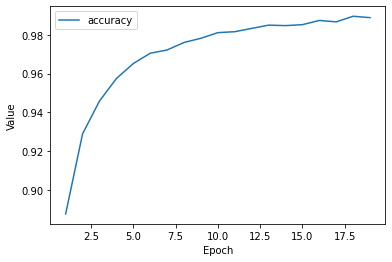

In [37]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "Prediction"
classification_threshold = 0.35

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [38]:
features = {name:np.array(value) for name, value in test_df.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

Consider rewriting this model with the Functional API.
11/11 [==============================] - 44s 128ms/step - loss: 0.0737 - accuracy: 0.9739


[0.07374988496303558, 0.9739130139350891]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
42/42 [==============================] - 72s 137ms/step - loss: 0.5579 - accuracy: 0.6906 - precision: 0.4824 - recall: 0.8416
Epoch 2/20
42/42 [==============================] - 6s 138ms/step - loss: 0.3054 - accuracy: 0.8990 - precision: 0.7634 - recall: 0.9469
Epoch 3/20
42/42 [==============================] - 6s 153ms/step - loss: 0.2278 - accuracy: 0.9422 - precision: 0.8491 - recall: 0.9751
Epoch 4/20
42/42 [==============================] - 6s 140ms/step - loss: 0.1697 - accuracy: 0.9584 - precision: 0.8841 - recall: 0.9867
Epoch 5/20
42/42 [==============================] - 6s 140ms/step - loss: 0.1439 - accuracy: 0.9616 - precision: 0.8927 - recall: 0.9867
Epoch 6/20
42/42 [==============================] - 6s 154ms/step - loss: 0.1234 - accuracy: 0.9698 - precision: 0.9129 - recall: 0.9909
Epoch 7/20
42/42 [==============================] - 6s 138ms/step -

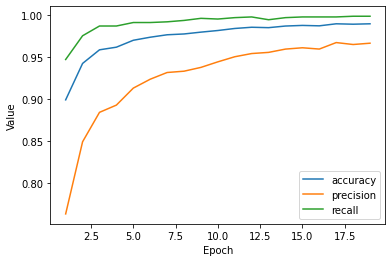

In [41]:
#@title Double-click to view the solution for Task 3.

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "Prediction"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)


# The new graphs suggest that precision and recall are 
# somewhat in conflict. That is, improvements to one of
# those metrics may hurt the other metric.